In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# full datasets, all buildings
boston = pd.read_excel('datasets/Boston Benchmarking Ordinance.xlsx', sheetname=2)
chicago = pd.read_excel('datasets/Chicago Benchmarking Ordinance.xlsx', sheetname=1)
minneapolis = pd.read_excel('datasets/Minneapolis Benchmarking Ordinance.xlsx', sheetname=3)
newyorkcity = pd.read_excel('datasets/New York Benchmarking Ordinance (excl. audit data).xlsx', sheetname=2)
philadelphia = pd.read_excel('datasets/Philadelphia Benchmarking Ordinance.xlsx', sheetname=1)
sanfrancisco = pd.read_excel('datasets/San Francisco Benchmarking Ordinance.xls', sheetname=1)  # sf doesn't have type labels
washingtondc = pd.read_excel('datasets/Washington D.C. Benchmarking Ordinance.xlsx', sheetname=4)  # missing a lot of labels

In [3]:
# hospital datasets
chi = chicago.loc[chicago['Property Type'] == 'Hospital (General Medical & Surgical)']
bos = boston.loc[boston['Property Type'] == 'Hospital (General Medical & Surgical)']
minn = minneapolis.loc[minneapolis['Property Type'] == 'Hospital (General Medical & Surgical)']
nyc = newyorkcity.loc[newyorkcity['Property Type'] == 'Hospital (General Medical & Surgical)']
phi = philadelphia.loc[philadelphia['Property Type'] == 'Hospital (General Medical & Surgical)']
wdc = washingtondc.loc[washingtondc['Property Type'] == 'Hospital (General Medical & Surgical)']

In [59]:
data = pd.concat([boston,chicago,minneapolis,newyorkcity,philadelphia,sanfrancisco,washingtondc])
hospitals = pd.concat([chi,bos,minn,nyc,phi,wdc])
data_no_boston = pd.concat([chicago,minneapolis,newyorkcity,philadelphia,sanfrancisco,washingtondc])
hospitals_no_boston = pd.concat([chi,minn,nyc,phi,wdc]) # Boston data does not have source EUI

# datasets of other property types
self_storage = data_no_boston.loc[data_no_boston['Property Type'] == 'Self-Storage Facility']
offices = data_no_boston.loc[data_no_boston['Property Type'] == 'Office']
k_12 = data_no_boston.loc[data_no_boston['Property Type'] == 'K-12 School']
hotels = data_no_boston.loc[data_no_boston['Property Type'] == 'Hotel']
warehouse = data_no_boston.loc[data_no_boston['Property Type'] == 'Non-Refrigerated Warehouse']
college_uni = data_no_boston.loc[data_no_boston['Property Type'] == 'College/University']
dormitory = data_no_boston.loc[data_no_boston['Property Type'] == 'Residence Hall/Dormitory']
retail = data_no_boston.loc[data_no_boston['Property Type'] == 'Retail Store']
senior_community = data_no_boston.loc[data_no_boston['Property Type'] == 'Senior Care Community']
parking = data_no_boston.loc[data_no_boston['Property Type'] == 'Parking']
worship = data_no_boston.loc[data_no_boston['Property Type'] == 'Worship Facility']
grocery = data_no_boston.loc[data_no_boston['Property Type'] == 'Supermarket/Grocery Store']
plant = data_no_boston.loc[data_no_boston['Property Type'] == 'Manufacturing/Industrial Plant']
mall = data_no_boston.loc[data_no_boston['Property Type'] == 'Strip Mall']
data_center = data_no_boston.loc[data_no_boston['Property Type'] == 'Data Center']


hospitals_and_others = pd.concat([hospitals_no_boston,
                                  hotels,
                                  retail,
                                  grocery,
                                  plant,
                                  mall,
                                  warehouse,
                                  college_uni,
                                  worship,
                                  data_center])


data_no_boston['Hospital?'] = (all_data_no_boston['Property Type'] == 'Hospital (General Medical & Surgical)')

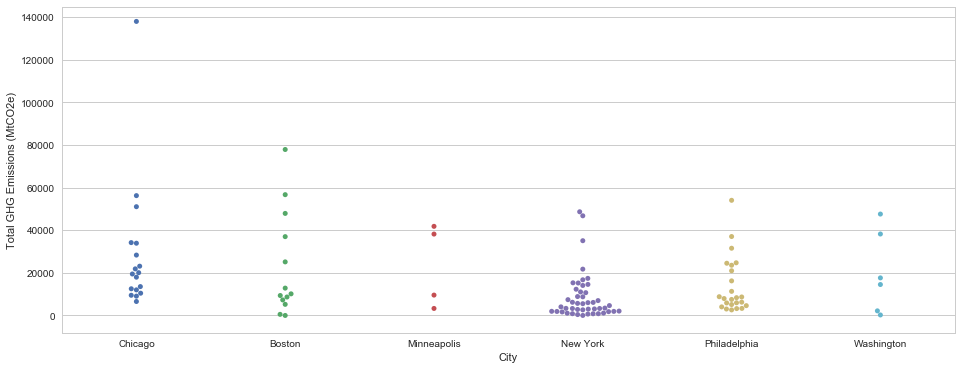

In [35]:
# plotting hospital GHGs by city
fig, ax = plt.subplots(figsize=(16,6))
sns.set_style("whitegrid")
GHG_swarm = sns.swarmplot(x='City', y='Total GHG Emissions (MtCO2e)', data=hospitals, ax=ax)

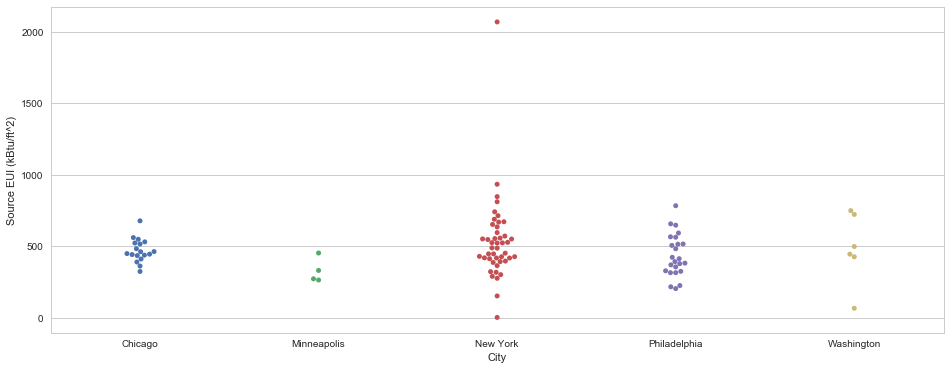

In [36]:
# plotting hospital source EUI by city
fig, ax = plt.subplots(figsize=(16,6))
sns.set_style('whitegrid')
source_EUI_swarm = sns.swarmplot(x='City', y='Source EUI (kBtu/ft^2)', data=hospitals_no_boston, ax=ax)

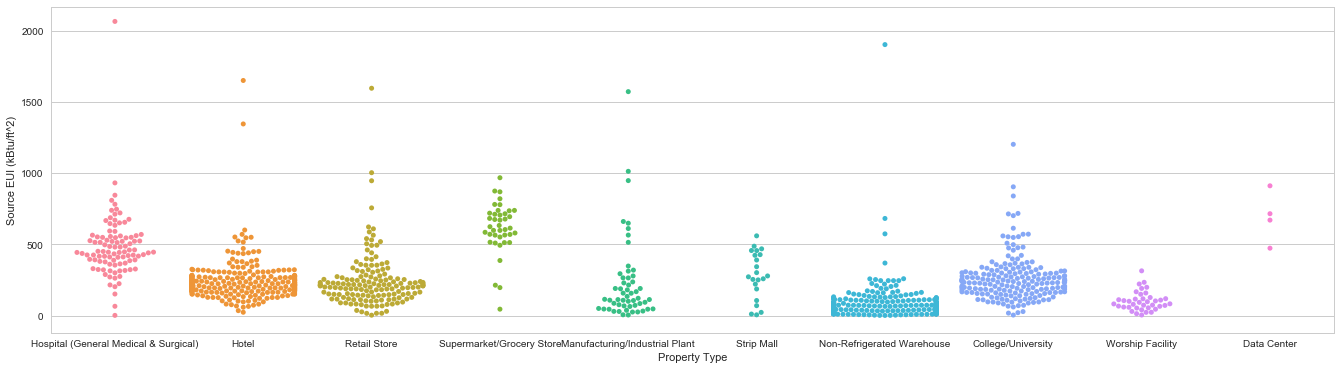

In [61]:
# plotting source EUI by building type

fig, ax = plt.subplots(figsize=(23,6))
sns.set_style("whitegrid")
#GHG_swarm = sns.swarmplot(x='Property Type', y='Source EUI (kBtu/ft^2)', data=data_no_boston, ax=ax)
#GHG_swarm = sns.swarmplot(x='Hospital?', y='Source EUI (kBtu/ft^2)', data=data_no_boston, ax=ax)
GHG_swarm = sns.swarmplot(x='Property Type', y='Source EUI (kBtu/ft^2)', data=hospitals_and_others, ax=ax)
plt.savefig('EUI_buildingtype.png')


In [33]:
print data_no_boston['Property Type'].value_counts()
print data_no_boston['Hospital?'].value_counts()

Multifamily Housing                                     9988
Office                                                  2337
K-12 School                                              456
Other                                                    374
Hotel                                                    328
Non-Refrigerated Warehouse                               305
College/University                                       221
Residence Hall/Dormitory                                 173
Retail Store                                             165
Senior Care Community                                    151
Distribution Center                                      121
Self-Storage Facility                                    117
Hospital (General Medical & Surgical)                    108
Parking                                                   92
Other - Entertainment/Public Assembly                     87
Medical Office                                            61
Manufacturing/Industrial